In [3]:
# Online Retail analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Modules are imported")

Modules are imported


In [5]:
# Load the Data 
df = pd.read_csv("Online Retail.csv",encoding="unicode_escape")

In [7]:
# To display top 5 rows 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [8]:
# To display bootom 5 rows 5 rows 
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [9]:
#Checking the types of data 
df.dtypes


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
df.shape

(541909, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
# Explore the data 
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
df["Country"].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [16]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
df["CustomerID"].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
17986.0       1
13256.0       1
18184.0       1
13747.0       1
15195.0       1
Name: count, Length: 4372, dtype: int64

In [18]:
# drop rows with missiinig  customer id 

In [20]:
df=df.dropna(subset=["CustomerID"])

In [21]:
df.shape

(406829, 8)

In [23]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [24]:
# drop duplicates 
df=df.drop_duplicates()

In [25]:
#check how many duplicate rows were removed 
df.shape[0]

401604

In [27]:
# remove negative or zero
df=df[df["Quantity"]>0]

In [30]:
df.shape[0]

392732

In [38]:
# convert invoice date to datetime format 
df.loc[:,"InvoiceDate"]= pd.to_datetime(df["InvoiceDate"],dayfirst=True)

In [40]:
df["InvoiceDate"].head()



0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [42]:
# calculate totalprice column 
df.loc[:,"TotalPrice"] = df["Quantity"]*df["UnitPrice"]

In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [44]:
df.shape

(392732, 9)

In [49]:
df[["Quantity","UnitPrice","TotalPrice"]].head(5)

,Quantity,UnitPrice,TotalPrice
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [56]:
# Revenue by Customer
customer_revunue=df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=True)
customer_revunue.head(10)

CustomerID
13256.0     0.00
16738.0     3.75
14792.0     6.20
16454.0     6.90
17956.0    12.75
16878.0    13.30
17763.0    15.00
15823.0    15.00
13307.0    15.00
16093.0    17.00
Name: TotalPrice, dtype: float64

In [60]:
#Revenue by Invoice
invoice_revenue = df.groupby('InvoiceNo')['TotalPrice'].sum().sort_values(ascending=False)
invoice_revenue.head(10)


InvoiceNo
581483    168469.60
541431     77183.60
556444     38970.00
567423     31698.16
556917     22775.93
572209     22206.00
567381     22104.80
563614     21880.44
550461     21535.90
572035     20277.92
Name: TotalPrice, dtype: float64

In [62]:
# Filter by Country (e.g., UK)
df_uk = df[df['Country'] == 'United Kingdom']
df_uk.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [63]:
# Visualize the data 

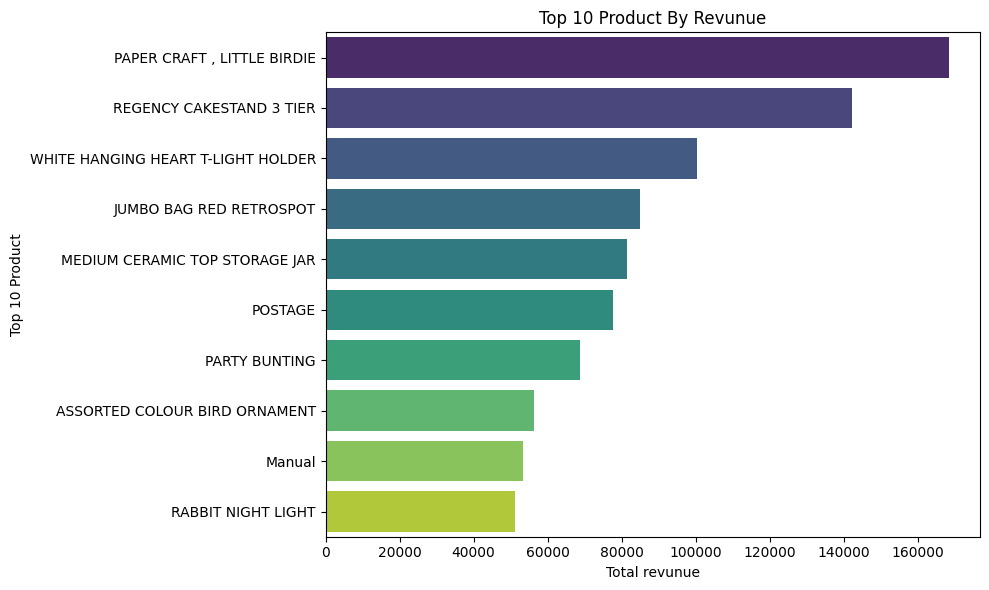

In [79]:
# Top 10 products by revunue 

top_10_products=df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_products.values, y=top_10_products.index,hue=top_10_products.index,palette="viridis")
plt.title("Top 10 Product By Revunue")
plt.xlabel("Total revunue")
plt.ylabel("Top 10 Product")
plt.tight_layout()
plt.savefig("top_10_Product.png")
plt.show()

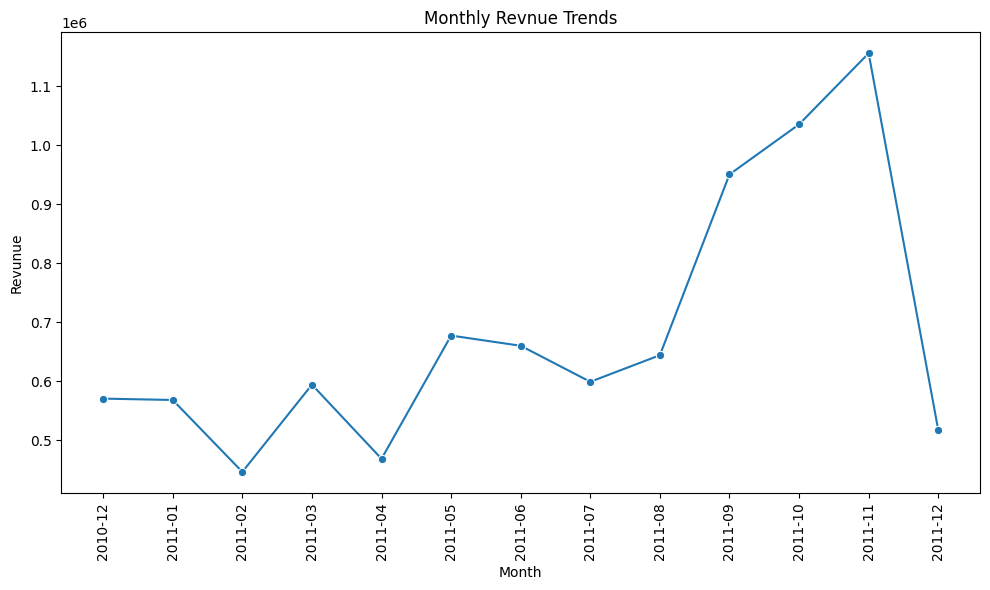

In [101]:
# monthly Revunue Trend

df["Month"]=df["InvoiceDate"].dt.to_period("M")
monthly_revunue=df.groupby("Month")["TotalPrice"].sum().reset_index()
monthly_revunue["Month"]=monthly_revunue["Month"].astype(str)

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_revunue,x="Month",y="TotalPrice",marker="o")
plt.title("Monthly Revnue Trends")
plt.xticks(rotation=90)
plt.ylabel("Revunue")
plt.tight_layout()
plt.savefig("Monhtly_revune_trend.png")
plt.show()

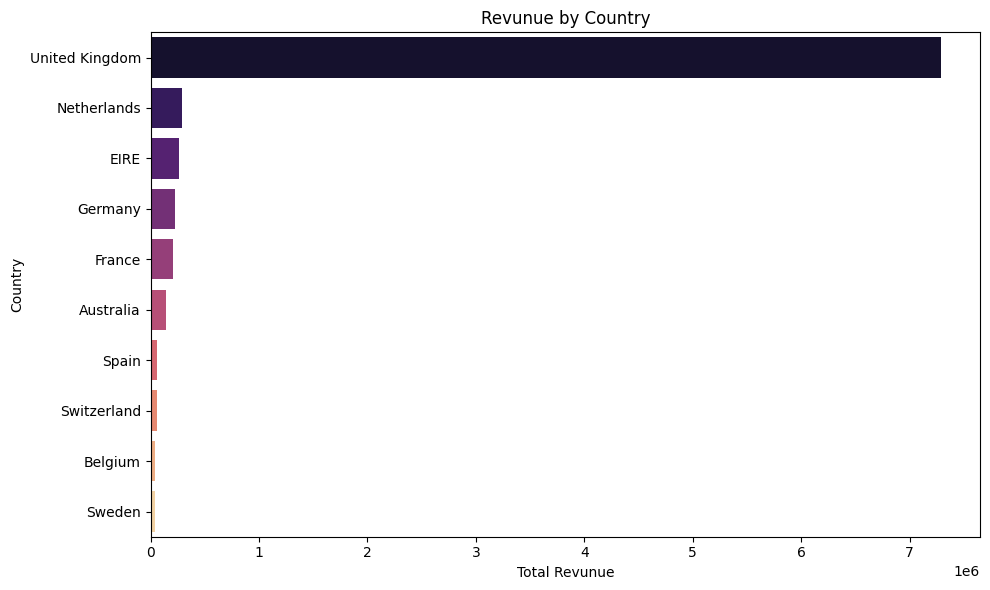

In [116]:
# Revunue by Country 
revunue_by_country=df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=revunue_by_country.values,y=revunue_by_country.index,hue=revunue_by_country.index,palette="magma")
plt.title("Revunue by Country")
plt.xlabel("Total Revunue")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("Revunue_By_Country")
plt.show()